In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import metrics

In [2]:
data_frame = pd.read_csv("fashion-mnist_train.csv")
data_matrix = data_frame.as_matrix()
x_train = data_matrix[:,1:]
y_train = data_matrix[:,0]
#class_names = set(y_train)
X_train, X_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3)
decision_tree = tree.DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train, y_train)
class_names = decision_tree.classes_

# Make a set of predictions for the validation data
y_pred = decision_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

Accuracy: 0.796111111111
             precision    recall  f1-score   support

          0       0.74      0.74      0.74      1767
          1       0.93      0.94      0.94      1822
          2       0.67      0.66      0.67      1801
          3       0.81      0.80      0.81      1816
          4       0.67      0.69      0.68      1794
          5       0.91      0.90      0.90      1786
          6       0.53      0.54      0.54      1818
          7       0.87      0.89      0.88      1798
          8       0.92      0.91      0.91      1763
          9       0.90      0.90      0.90      1835

avg / total       0.80      0.80      0.80     18000



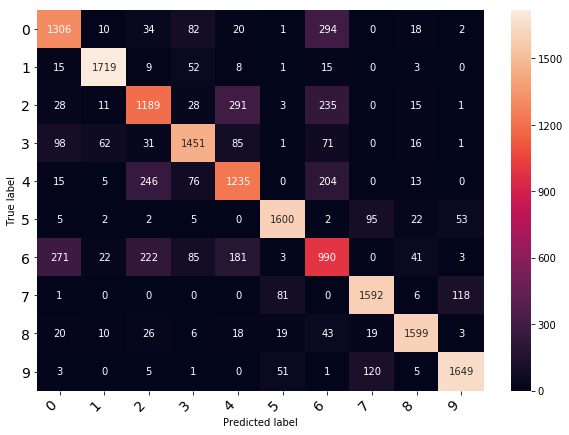

In [4]:
# plot confusion matrix
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sn.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

# Print confusion matrix
cm = metrics.confusion_matrix(y_valid, y_pred)
print_confusion_matrix(cm, class_names)

print('')

In [5]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"], \
             'max_depth': list(range(3, 20, 3)), \
             'min_samples_split': [50] }

# Perform the search with cross validation
tuned_decision_tree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=2, verbose = 0, \
                                return_train_score=True)
tuned_decision_tree.fit(X_train, y_train)

# Print details
print("Best parameters set found on training set:")
display(tuned_decision_tree.best_params_)
display(tuned_decision_tree.best_score_)
display(tuned_decision_tree.cv_results_)

Best parameters set found on training set:


{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 50}

0.79473809523809524

{'mean_fit_time': array([  9.14173162,  14.75231969,  21.25664771,  26.78412759,
         30.91752255,  34.83845866,   9.88455367,  22.30817914,
         34.25114894,  45.77073288,  46.96526301,  45.92637575]),
 'mean_score_time': array([ 0.21719623,  0.19364965,  0.19267452,  0.19767821,  0.19817853,
         0.20617723,  0.19453943,  0.18517017,  0.20068192,  0.21419811,
         0.20220983,  0.20618737]),
 'mean_test_score': array([ 0.49233333,  0.72619048,  0.78380952,  0.79297619,  0.7872381 ,
         0.78219048,  0.53807143,  0.74642857,  0.7917619 ,  0.7947381 ,
         0.78988095,  0.79061905]),
 'mean_train_score': array([ 0.49702478,  0.73835723,  0.82116669,  0.85778606,  0.87769042,
         0.88319033,  0.54447398,  0.75778519,  0.83080941,  0.86492869,
         0.87464294,  0.8765716 ]),
 'param_criterion': masked_array(data = ['gini' 'gini' 'gini' 'gini' 'gini' 'gini' 'entropy' 'entropy' 'entropy'
  'entropy' 'entropy' 'entropy'],
              mask = [False False Fals

In [6]:
# Make a set of predictions for the validation data using tuned tree 
# and compare classification accuracy
y_pred = tuned_decision_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred)
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

Accuracy: 0.81
             precision    recall  f1-score   support

          0       0.76      0.77      0.77      1767
          1       0.95      0.93      0.94      1822
          2       0.69      0.70      0.69      1801
          3       0.82      0.81      0.81      1816
          4       0.66      0.75      0.70      1794
          5       0.91      0.89      0.90      1786
          6       0.60      0.52      0.55      1818
          7       0.88      0.91      0.90      1798
          8       0.91      0.91      0.91      1763
          9       0.92      0.90      0.91      1835

avg / total       0.81      0.81      0.81     18000



In [7]:
# load MNIST Fashion test data and predict the label
test = pd.read_csv('fashion-mnist_test.csv')
X_test = data_matrix[:,1:]
y_test = data_matrix[:,0]

y_pred_test = tuned_decision_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Model accuracy on test data: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred_test))

Model accuracy on test data: 0.844516666667
             precision    recall  f1-score   support

          0       0.81      0.82      0.81      6000
          1       0.96      0.95      0.96      6000
          2       0.74      0.76      0.75      6000
          3       0.86      0.84      0.85      6000
          4       0.70      0.79      0.74      6000
          5       0.93      0.93      0.93      6000
          6       0.68      0.59      0.63      6000
          7       0.91      0.93      0.92      6000
          8       0.94      0.94      0.94      6000
          9       0.94      0.92      0.93      6000

avg / total       0.84      0.84      0.84     60000

